In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
# Read File
data=pd.read_csv('/content/restaurants_data_analysis.csv')

UnicodeDecodeError: ignored

In [5]:
# no of rows and columns
data.shape

(15617, 23)

In [6]:
# checking for null values
data.isnull().sum()

budget                           0
is_new_until                    95
latitude                         0
longitude                        0
minimum_delivery_time            0
minimum_order_amount             0
minimum_pickup_time              0
name                             0
post_code                        2
rating                           1
review_number                    1
review_with_comment_number       1
vertical                         1
vertical_parent                  1
delivery_provider                1
is_active                        1
is_new                           1
is_promoted                      1
city                             1
timezone                         1
dine_in                          1
main_cuisine                  1641
country                          1
dtype: int64

In [8]:
# hEAD OF DATA
print(data.head(5))

   budget          is_new_until   latitude   longitude  minimum_delivery_time  \
0       2  2023-01-08T07:58:20Z  11.578462  104.894039                      0   
1       3  2023-01-08T07:58:40Z  11.589699  104.874987                      0   
2       3  2023-01-08T08:02:26Z  11.544155  104.916032                  29810   
3       3  2023-01-08T07:58:23Z  11.534426  104.885958                  29800   
4       3  2023-01-08T07:59:17Z  11.552822  104.883800                  29800   

   minimum_order_amount  minimum_pickup_time  \
0                     0                   15   
1                     0                   15   
2                     0                    5   
3                     0                    5   
4                     0                    5   

                                               name post_code  rating  ...  \
0        LG BrandShop (Toul Kork) - Vendor Delivery     12152     0.0  ...   
1          LG BrandShop (Sen Sok) - Vendor Delivery     12105     0.

In [9]:
#Checking of duplicate values
data.duplicated().sum()


0

In [10]:
# CHECKING DATA TYPES
data.dtypes

budget                          int64
is_new_until                   object
latitude                      float64
longitude                     float64
minimum_delivery_time           int64
minimum_order_amount            int64
minimum_pickup_time             int64
name                           object
post_code                      object
rating                        float64
review_number                 float64
review_with_comment_number    float64
vertical                       object
vertical_parent                object
delivery_provider              object
is_active                      object
is_new                         object
is_promoted                    object
city                           object
timezone                       object
dine_in                        object
main_cuisine                   object
country                        object
dtype: object

In [11]:
# checking the descriptive statistics
data.describe()

,budget,latitude,longitude,minimum_delivery_time,minimum_order_amount,minimum_pickup_time,rating,review_number,review_with_comment_number
count,15617.000000,15617.000000,15617.000000,15617.000000,15617.0,15617.000000,15616.000000,15616.000000,15616.0
mean,1.597042,17.845310,90.828749,11419.126273,0.0,12.440161,3.010585,262.853227,0.0
std,0.743964,7.803911,17.246676,12696.939932,0.0,3.796504,1.821948,1288.418885,0.0
min,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
25%,1.000000,11.552495,67.198282,0.000000,0.0,10.000000,1.000000,1.000000,0.0
50%,1.000000,11.997343,103.859250,0.000000,0.0,15.000000,3.900000,14.000000,0.0
75%,2.000000,24.907152,104.897442,29125.000000,0.0,15.000000,4.300000,107.000000,0.0
max,3.000000,33.643648,105.856145,30080.000000,0.0,60.000000,5.000000,100479.000000,0.0


In [12]:
data.columns


Index(['budget', 'is_new_until', 'latitude', 'longitude',
       'minimum_delivery_time', 'minimum_order_amount', 'minimum_pickup_time',
       'name', 'post_code', 'rating', 'review_number',
       'review_with_comment_number', 'vertical', 'vertical_parent',
       'delivery_provider', 'is_active', 'is_new', 'is_promoted', 'city',
       'timezone', 'dine_in', 'main_cuisine', 'country'],
      dtype='object')

In [14]:
# Number of countries with its number
print(data['country'].value_counts())

Cambodia    9475
Pakistan    6141
Name: country, dtype: int64


In [17]:
 data.main_cuisine

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
15612    Fast Food
15613    Fast Food
15614    Pakistani
15615    Pakistani
15616          NaN
Name: main_cuisine, Length: 15617, dtype: object

In [21]:
# Rating greater than 4
rating_greater_than_4=data[data['rating']>4.0]
print(rating_greater_than_4)

       budget          is_new_until   latitude   longitude  \
6           1  2021-07-21T00:00:00Z  11.566571  104.930063   
8           1  2021-09-18T00:00:00Z  11.542102  104.915222   
9           1  2022-11-25T00:00:00Z  11.549776  104.900372   
10          2  2019-12-27T00:00:00Z  11.581003  104.845944   
11          1  2021-10-20T00:00:00Z  11.527674  104.880453   
...       ...                   ...        ...         ...   
15601       2  2021-01-21T00:00:00Z  31.520752   74.325666   
15604       1  2021-08-28T00:00:00Z  31.570741   74.415629   
15608       2  2022-03-28T00:00:00Z  31.554542   74.298348   
15609       1  2020-12-26T00:00:00Z  31.462194   74.296778   
15610       1  2021-03-19T00:00:00Z  31.564788   74.291325   

       minimum_delivery_time  minimum_order_amount  minimum_pickup_time  \
6                      29815                     0                   10   
8                      29810                     0                   10   
9                          0  

In [24]:
# Filter for rows where city is Lahore
city_lhr=data[data['city']=='Lahore']
city_lhr

,budget,is_new_until,latitude,longitude,minimum_delivery_time,minimum_order_amount,minimum_pickup_time,name,post_code,rating,...,vertical_parent,delivery_provider,is_active,is_new,is_promoted,city,timezone,dine_in,main_cuisine,country
13472,1,2022-04-18T00:00:00Z,31.521152,74.349968,18835,0,15,Pure Home Food,54000,4.1,...,Restaurant,platform_delivery,True,False,False,Lahore,Asia/Karachi,False,Pakistani,Pakistan
13473,2,2022-12-04T00:00:00Z,31.549618,74.385312,0,0,15,Hot & Crusty,54000,2.1,...,Restaurant,platform_delivery,True,False,False,Lahore,Asia/Karachi,False,Fast Food,Pakistan
13474,1,2019-10-09T00:00:00Z,31.520444,74.324356,18820,0,5,Student Sindhi Chicken Biryani & BBQ - Muslim ...,54000,3.8,...,Restaurant,platform_delivery,True,False,False,Lahore,Asia/Karachi,False,Biryani,Pakistan
13475,2,2018-10-05T00:00:00Z,31.500318,74.321541,18820,0,10,Usman Juice & Ice Cream Corner,54000,4.1,...,Restaurant,platform_delivery,True,False,False,Lahore,Asia/Karachi,False,NaN,Pakistan
13476,3,NaN,31.424830,74.265254,0,0,12,London Melt,54000,4.0,...,Restaurant,platform_delivery,True,False,False,Lahore,Asia/Karachi,False,Pizza,Pakistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,1,2022-09-15T00:00:00Z,31.476618,74.402415,18835,0,10,Baking Corner,54000,4.0,...,Restaurant,platform_delivery,True,False,False,Lahore,Asia/Karachi,False,Desserts,Pakistan
15612,1,2023-01-30T19:00:00Z,31.573105,74.322976,18830,0,10,Meat You There,54000,3.3,...,Restaurant,platform_delivery,True,True,False,Lahore,Asia/Karachi,False,Fast Food,Pakistan
15613,1,2023-01-05T11:51:34Z,31.624174,74.298302,0,0,15,Red and Green Pepper,54000,2.4,...,Restaurant,platform_delivery,True,False,False,Lahore,Asia/Karachi,False,Fast Food,Pakistan
15614,3,2018-06-27T00:00:00Z,31.456267,74.299416,0,0,22,WOK This Way Express,54782,3.9,...,Restaurant,platform_delivery,True,False,False,Lahore,Asia/Karachi,False,Pakistani,Pakistan


In [28]:
# Average rating of restaurants
data['rating'].mean()

3.0105852971311475

In [30]:
# Classifying main cuisines
data.groupby('main_cuisine').main_cuisine.count()

main_cuisine
American             19
Asian              4262
BBQ                  48
Beverages          2359
Biryani             118
Burgers             250
Cakes & Bakery      238
Cambodian           459
Chicken               1
Chinese             481
Congee                1
Continental          35
Desserts            452
Dumpling              1
European             22
Fast Food          1682
French                5
Fried Chicken        12
Greek                 1
Halal                15
Healthy Food         72
Indian               61
Indonesian            7
International         3
Italian              85
Japanese            110
Korean              104
Lebanese              1
Malaysian             5
Meat                  1
Mediterranean         1
Mexican              10
Middle Eastern       16
Noodles               1
Pakistani          1921
Pizza               622
Pulao                18
Rice Dishes           1
Sandwiches           43
Savouries            58
Seafood              98
Sha

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6041 (\N{KHMER LETTER YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6089 (\N{KHMER SIGN MUUSIKATOAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6070 (\N{KHMER VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6036 (\N{KHMER LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6075 (\N{KHMER VOWEL SIGN U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/cor

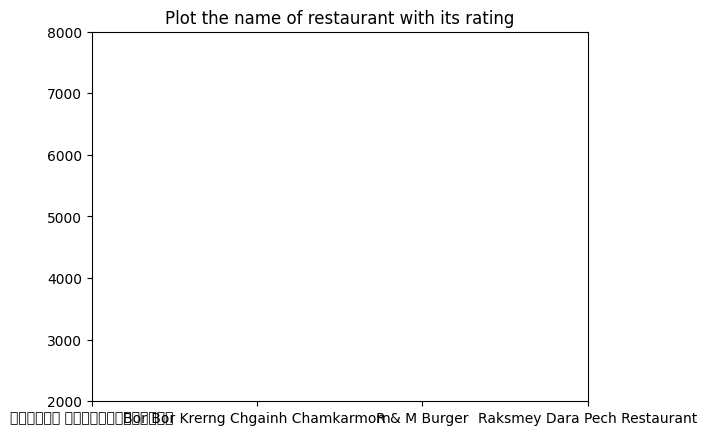

In [32]:
fig=plt.figure()
ax=plt.axes()
ax.plot(data['name'],data['rating'])
ax.axis([27,30,2000,8000])
ax.set_title("Plot the name of restaurant with its rating")
plt.show()

In [37]:
plt.figure(figsize=(20,10))
sns.lineplot(x='name',y='ratings',data=data)
plt.show()

ValueError: ignored

<Figure size 2000x1000 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x='name',y='cuisine_name',data=data)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x='city',y='timezone',data=data)
plt.show()

In [ ]:
# Seaborn Barplot
sns.countplot(data['ratings'])

In [ ]:
# Seaborn Scatter plot
sns.scatterplot(x='name',y='rating',data=data)


In [ ]:
sns.scatterplot(x='name',y='cuisine_name',data=data)


In [ ]:
sns.scatterlot(x='city',y='timezone',data=data)


In [ ]:
# Histogram
sns.distplot(data['rating'],bins=2,kde=False)



In [ ]:
# Missing Data Visualization
plt.figure(figsize=(20, 10))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Visualization")
plt.show()

In [ ]:
# Fillling missing values
data.is_new_until.fillna('Unknown')

In [ ]:
data.post_code.fillna('Unknown')
data.rating.fillna(1.0)
data.review_number.fillna(1.0)
data.review_with_comment_number.fillna(1.0)
data.vertical.fillna('Unknown')
data.vertical_parent.fillna('Unknown')
data.delivery_provider.fillna('Unknown')
data.is_active.fillna('Unknown')
data.is_new.fillna('Unknown')
data.is_promoted.fillna('Unknown')
data.city.fillna('Unknown')
data.timezone.fillna('Unknown')
data.dine_in.fillna('Unknown')
data.main_cuisine.fillna('Unknown')
data.country.fillna('Unknown')